In [1]:
import os
import tensorflow as tf
from roboflow import Roboflow
from dotenv import load_dotenv
load_dotenv("labelbox.env")

True

In [22]:
print(tf.version.VERSION)

2.9.1


In [2]:
RF_KEY = os.getenv("rb_key")
rf = Roboflow(api_key=RF_KEY)
project = rf.workspace("personal-y96vs").project("soccer-object-detection-yj7hm")
# dataset = project.version(1).download("tensorflow")

loading Roboflow workspace...
loading Roboflow project...


In [3]:
# dataset.location = r"C:\Users\yingy\Desktop\Py_personal\Learning\soccer\tf_object_detection\Soccer Object detection.v1i.tfrecord_ignore_data"
# LOCATION = dataset.location
LOCATION = r"C:\Users\yingy\Desktop\Py_personal\Learning\soccer\tf_object_detection\Soccer Object detection.v1i.tfrecord_ignore_data"
print("location:", LOCATION)
CLASSES = sorted(project.classes.keys())
print("classes:", CLASSES)

location: C:\Users\yingy\Desktop\Py_personal\Learning\soccer\tf_object_detection\Soccer Object detection.v1i.tfrecord_ignore_data
classes: ['ball', 'field_line', 'goal', 'keeper', 'player', 'ref', 'score', 'time']


In [5]:
# test_record_fname = dataset.location + '/test/cells.tfrecord'
train_record_fname = LOCATION + '/train/people.tfrecord'
label_map_pbtxt_fname = LOCATION + '/train/people_label_map.pbtxt'

In [40]:
raw_dataset = tf.data.TFRecordDataset(train_record_fname)

In [65]:
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example.features.feature.)

<bound method Mapping.keys of {'image/object/bbox/ymax': float_list {
  value: 0.6000000238418579
  value: 0.546875
  value: 0.4859375059604645
  value: 0.534375011920929
  value: 0.707812488079071
  value: 0.910937488079071
  value: 0.578125
  value: 0.38749998807907104
  value: 0.4390625059604645
  value: 0.33125001192092896
  value: 0.43281251192092896
  value: 0.45781248807907104
  value: 0.38749998807907104
  value: 0.45781248807907104
  value: 0.503125011920929
  value: 0.40625
  value: 0.557812511920929
  value: 0.4609375
  value: 0.8968750238418579
  value: 0.12812499701976776
  value: 0.09843750298023224
}
, 'image/object/bbox/xmax': float_list {
  value: 0.02812499925494194
  value: 0.1484375
  value: 0.14374999701976776
  value: 0.3140625059604645
  value: 0.3296875059604645
  value: 0.770312488079071
  value: 0.5390625
  value: 0.328125
  value: 0.4906249940395355
  value: 0.4859375059604645
  value: 0.5484374761581421
  value: 0.6656249761581421
  value: 0.698437511920929


In [76]:
# Create a dictionary describing the features.
image_feature_description = {
#     'image/object/bbox/ymax': tf.io.FixedLenFeature([], tf.float32),
#     'image/object/bbox/ymin':  tf.io.FixedLenFeature([], tf.float32),
#     'image/object/bbox/xmax': tf.io.FixedLenFeature([], tf.float32),
#     'image/object/bbox/xmin': tf.io.FixedLenFeature([], tf.float32),
#     'image/object/class/label': tf.io.FixedLenFeature([], tf.int64),
    'image/format': tf.io.FixedLenFeature([], tf.string),
    'image/height': tf.io.FixedLenFeature([], tf.int64),
    'image/width': tf.io.FixedLenFeature([], tf.int64),
    'image/filename': tf.io.FixedLenFeature([], tf.string),
#     'image/object/class/text': tf.io.FixedLenFeature([], tf.string),
    'image/encoded': tf.io.FixedLenFeature([], tf.string),
}

def _parse_image_function(example_proto):
  # Parse the input tf.train.Example proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, image_feature_description)

parsed_image_dataset = raw_dataset.map(_parse_image_function)
parsed_image_dataset

<MapDataset element_spec={'image/encoded': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/filename': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/format': TensorSpec(shape=(), dtype=tf.string, name=None), 'image/height': TensorSpec(shape=(), dtype=tf.int64, name=None), 'image/width': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

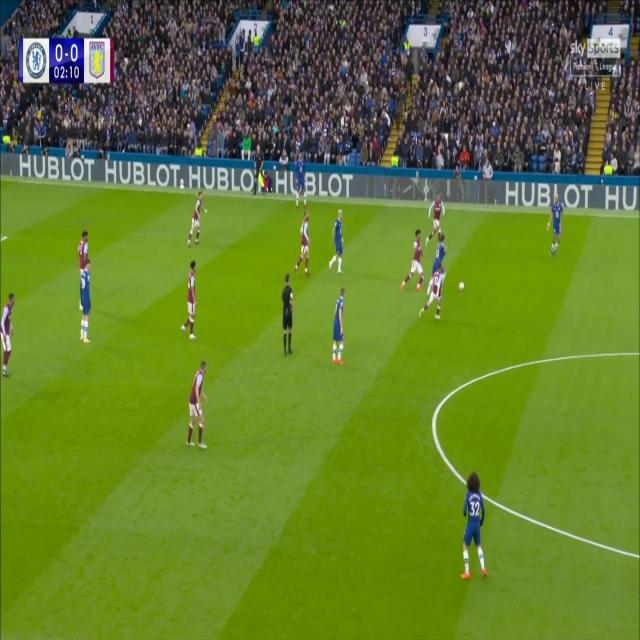

In [80]:
import IPython.display as display
for image_features in parsed_image_dataset.take(1):
    image_raw = image_features['image/encoded'].numpy()
    display.display(display.Image(data=image_raw))

In [58]:
for i, raw_record in enumerate(raw_dataset.take(1)):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    info = {}
    info['image/encoded'] = example.features.feature['image/encoded'].bytes_list.value[0]

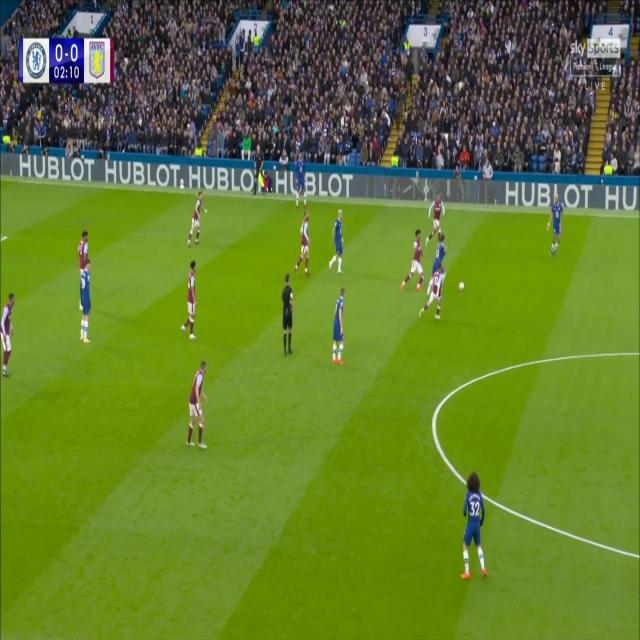

In [59]:
import io
from PIL import Image

imageStream = io.BytesIO(info['image/encoded'])
imageFile = Image.open(imageStream)
display(imageFile)

# References

https://www.tensorflow.org/guide/data#consuming_tfrecord_data

[How to Train YOLO-NAS on a Custom Dataset](https://blog.roboflow.com/yolo-nas-how-to-train-on-custom-dataset/): [Notebook](https://colab.research.google.com/github/roboflow-ai/notebooks/blob/main/notebooks/train-yolo-nas-on-custom-dataset.ipynb?ref=blog.roboflow.com#scrollTo=sGBOHyPc11LA)

[Read tfrecord dataset for images](https://www.tensorflow.org/tutorials/load_data/tfrecord)